In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [35]:
import tensorflow as tf
import tensorflow

import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=False)

import matplotlib
matplotlib.use("Pdf")
import matplotlib.pyplot as plt
%matplotlib inline

sess = tf.InteractiveSession()

In [4]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [5]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1,28,28,1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

In [6]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [10]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
sess.run(tf.initialize_all_variables())

for i in range(200):
  batch = mnist.train.next_batch(50)
  if i%10 == 0:
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.08
step 10, training accuracy 0.14
step 20, training accuracy 0.4
step 30, training accuracy 0.66
step 40, training accuracy 0.66
step 50, training accuracy 0.7
step 60, training accuracy 0.86
step 70, training accuracy 0.8
step 80, training accuracy 0.9
step 90, training accuracy 0.82
step 100, training accuracy 0.84
step 110, training accuracy 0.86
step 120, training accuracy 0.86
step 130, training accuracy 0.82
step 140, training accuracy 0.84
step 150, training accuracy 0.8
step 160, training accuracy 0.86
step 170, training accuracy 0.76
step 180, training accuracy 0.92
step 190, training accuracy 0.94
test accuracy 0.9063


step 0, training accuracy 0.16
step 1, training accuracy 0.08
step 2, training accuracy 0.28
step 3, training accuracy 0.22
step 4, training accuracy 0.32


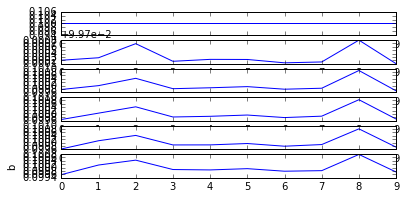

In [39]:
sess.run(tf.initialize_all_variables())

plt.subplot(811)
plt.plot(b_fc2.eval())    
    
for i in range(5):
    batch = mnist.train.next_batch(50)
    
    if i%1 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        
    for variable in tf.trainable_variables():
        gradient = tf.gradients(cross_entropy, variable)[0]
        sess.run(variable.assign_add(-0.0001 * gradient), feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
    
    plt.subplot(810 + i + 2)
    plt.plot(b_fc2.eval())    

plt.ylabel('b')
plt.show()
        
#print("test accuracy %g"%accuracy.eval(feed_dict={
#    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

In [ ]:
sess.run(tf.initialize_all_variables())

plt.subplot(811)
plt.plot(b_fc2.eval())    
    
for i in range(5):
    batch = mnist.train.next_batch(50)
    
    if i%1 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        
    for variable in tf.trainable_variables():
        gradient = tf.gradients(cross_entropy, variable)[0]
        sess.run(variable.assign_add(-0.0001 * gradient), feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
    
    plt.subplot(810 + i + 2)
    plt.plot(b_fc2.eval())    

plt.ylabel('b')
plt.show()
        
#print("test accuracy %g"%accuracy.eval(feed_dict={
#    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))